# Project: League of Legends Match Predictor 


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 84.5 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd  # Importing pandas library
from sklearn.model_selection import train_test_split  # Importing train_test_split
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler
import torch  # Importing PyTorch

# Step 1: Load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
data = pd.read_csv(url)

# Step 2: Split data into features and target
X = data.drop('win', axis=1)
y = data['win']

# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Optional: Print the shapes of the tensors to verify
print(f'X_train_tensor shape: {X_train_tensor.shape}')
print(f'X_test_tensor shape: {X_test_tensor.shape}')
print(f'y_train_tensor shape: {y_train_tensor.shape}')
print(f'y_test_tensor shape: {y_test_tensor.shape}')

X_train_tensor shape: torch.Size([800, 8])
X_test_tensor shape: torch.Size([200, 8])
y_train_tensor shape: torch.Size([800])
y_test_tensor shape: torch.Size([200])


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Define a linear layer for logistic regression
        self.linear = nn.Linear(input_dim, 1)  # 1 output for binary classification

    def forward(self, x):
        # Apply the linear layer followed by the sigmoid activation function
        return torch.sigmoid(self.linear(x))

# Step 2: Initialize the Model, Loss Function, and Optimizer
input_dim = X_train_tensor.shape[1]  # Get the number of features from the training data
model = LogisticRegressionModel(input_dim)  # Create an instance of the model

# Loss Function: Binary Cross-Entropy Loss
loss_function = nn.BCELoss()

# Optimizer: Stochastic Gradient Descent with a learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Optional: Print model summary
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


In [10]:
# Step 3: Train the logistic regression model on the dataset

# Set the number of epochs for training
num_epochs = 1000

# Training Loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    # Zero the gradients
    optimizer.zero_grad()
    # Pass the training data through the model to get predictions
    outputs = model(X_train_tensor).squeeze()  # Squeeze to remove extra dimensions
    # Calculate the loss using the defined loss function
    loss = loss_function(outputs, y_train_tensor)
    # Perform backpropagation
    loss.backward()
    # Update the model's weights
    optimizer.step()
    # Print Loss Every 100 Epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Ensure no gradients are calculated during evaluation
    # Get predictions on both the training set and the test set
    train_outputs = model(X_train_tensor).squeeze()
    test_outputs = model(X_test_tensor).squeeze()
    
    # Apply threshold of 0.5 for classification
    train_predictions = (train_outputs >= 0.5).float()
    test_predictions = (test_outputs >= 0.5).float()

# Calculate Accuracy
train_accuracy = (train_predictions == y_train_tensor).float().mean()  # Training accuracy
test_accuracy = (test_predictions == y_test_tensor).float().mean()  # Test accuracy

# Print Accuracy
print(f'Training Accuracy: {train_accuracy.item() * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')



Epoch [100/1000], Loss: 0.7116
Epoch [200/1000], Loss: 0.7017
Epoch [300/1000], Loss: 0.6955
Epoch [400/1000], Loss: 0.6916
Epoch [500/1000], Loss: 0.6891
Epoch [600/1000], Loss: 0.6876
Epoch [700/1000], Loss: 0.6867
Epoch [800/1000], Loss: 0.6861
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856
Training Accuracy: 54.62%
Test Accuracy: 51.50%


In [12]:
from sklearn.metrics import accuracy_score

# Set up the optimizer with L2 regularization
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Define loss function
criterion = nn.BCELoss()  # Assuming binary classification

# Train the model
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))  # Reshape if necessary
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    test_outputs = model(X_test_tensor)

# Apply threshold to get predictions
train_predictions = (train_outputs >= 0.5).float()
test_predictions = (test_outputs >= 0.5).float()

# Calculate accuracy
train_accuracy = accuracy_score(y_train_tensor.numpy(), train_predictions.numpy())
test_accuracy = accuracy_score(y_test_tensor.numpy(), test_predictions.numpy())

# Print the accuracies
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.5450
Test Accuracy: 0.5050


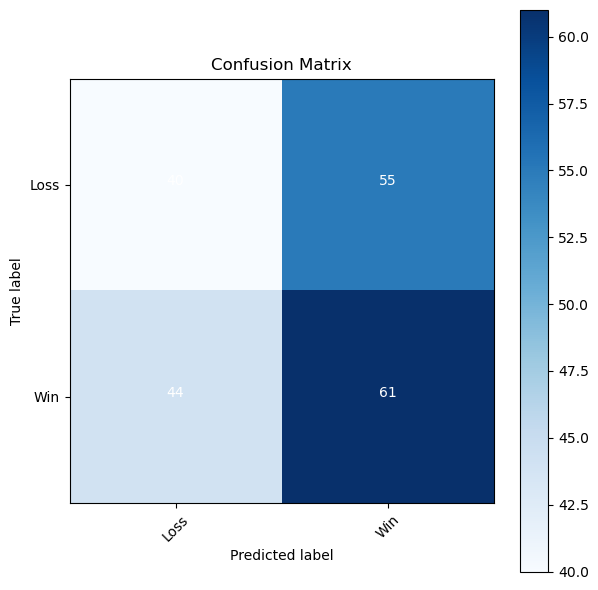

Classification Report:
               precision    recall  f1-score   support

        Loss       0.48      0.42      0.45        95
         Win       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



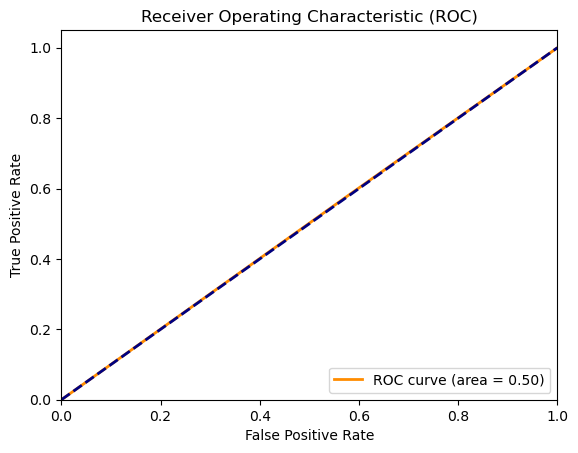

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

y_pred_test_labels = (test_predictions > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


In [32]:
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

torch.save(model.state_dict(), 'logistic_regression_model.pth')  # Save model parameters

loaded_model = LogisticRegressionModel(input_dim)  # Create a new instance of the model
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))  # Load the saved parameters

# Set the model to evaluation mode
loaded_model.eval()

# Evaluate the loaded model on the test dataset
with torch.no_grad():  # Ensure no gradients are computed
    y_pred_probs = loaded_model(X_test_tensor)  # Get predictions on the test data
    y_pred = (y_pred_probs > 0.5).int()  # Convert probabilities to binary predictions

# Calculate accuracy or any other metric
accuracy = accuracy_score(y_test, y_pred.numpy())  # Convert predictions to numpy for accuracy calculation
print(f'Accuracy of the loaded model: {accuracy:.2f}')


Accuracy of the loaded model: 0.51


In [36]:
learning_rates = [0.01, 0.05, 0.1]
input_dim = X_train.shape[1]
best_accuracy = 0
best_lr = None

for lr in learning_rates:
    # Reinitialize the model and optimizer
    model = LogisticRegressionModel(input_dim)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    
    # Train the model
    for epoch in range(50):  # Fixed number of epochs
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_tensor).squeeze()
        loss = criterion(y_pred, y_train_tensor)
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_test_tensor).squeeze()
        y_pred = (y_pred_probs > 0.5).int()
        accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
        print(f"Learning rate: {lr}, Test Accuracy: {accuracy:.2f}")
        
        # Track the best learning rate
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr

print(f"The best learning rate is {best_lr} with a test accuracy of {best_accuracy:.2f}")



Learning rate: 0.01, Test Accuracy: 0.45
Learning rate: 0.05, Test Accuracy: 0.47
Learning rate: 0.1, Test Accuracy: 0.56
The best learning rate is 0.1 with a test accuracy of 0.56


        Feature  Importance
3   gold_earned    0.171163
0         kills    0.126253
5  wards_placed    0.101485
1        deaths   -0.004087
4            cs   -0.006349
2       assists   -0.014084
7  damage_dealt   -0.020198
6  wards_killed   -0.033586


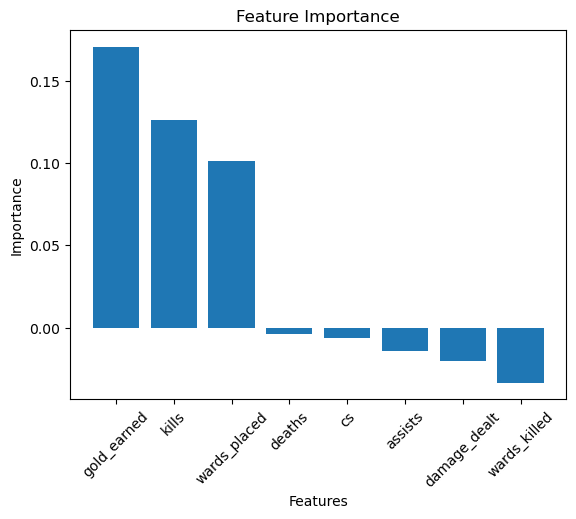

In [34]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

##Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
##Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
##Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


